**Import the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Load the data from keras

In [2]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [3]:
mnist=keras.datasets.mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Check the shape of the data

In [5]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

There are 60 images in the datset with the pixel size 28*28

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Define the class names

In [8]:
class_names = ['zero','one','two','three','four','five',
               'six','seven','eight','nine']

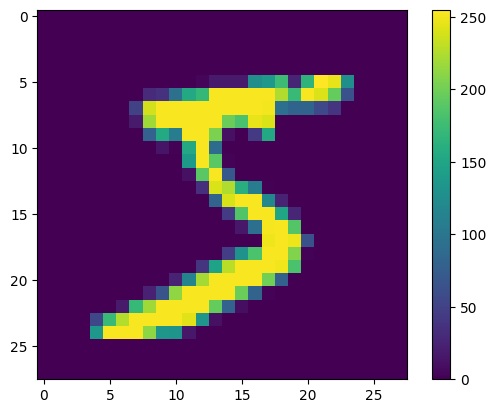

In [13]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

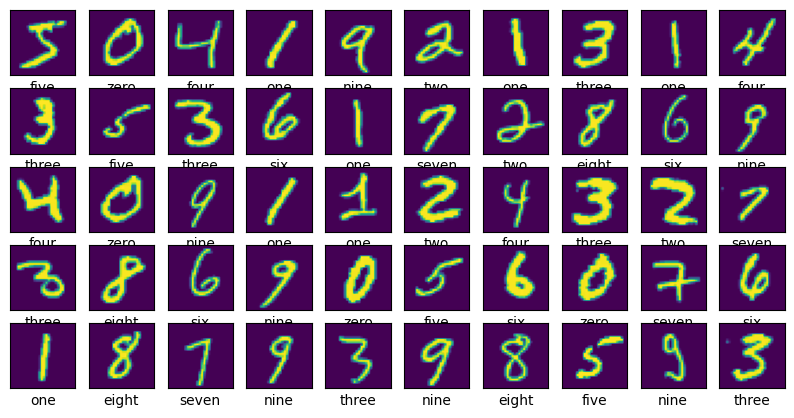

In [27]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [28]:
np.max(X_train)

255

**Normalization**
- The neural networks does not take the values more than one.
- max value in the X_train is 255 we hae to dicide it with 255

In [29]:
X_train = X_train/255.0
x_test = X_test/255.0

Develop the model

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [38]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=10,
          verbose=True)

Epoch 1/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2101 - accuracy: 0.9384
Epoch 2/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0927 - accuracy: 0.9710
Epoch 3/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0643 - accuracy: 0.9799
Epoch 4/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0474 - accuracy: 0.9847
Epoch 5/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0383 - accuracy: 0.9874
Epoch 6/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0305 - accuracy: 0.9898
Epoch 7/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0259 - accuracy: 0.9913
Epoch 8/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 9/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 10/10
6000/6000 [==============================] - 17s 3ms/step - l

**Model Evaluation**

In [47]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 22.7374 - accuracy: 0.9781
0.9781000018119812


In [48]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [51]:
print(y_pred[0])

[0.         0.         0.         0.         0.         0.
 0.         0.99999994 0.         0.        ]


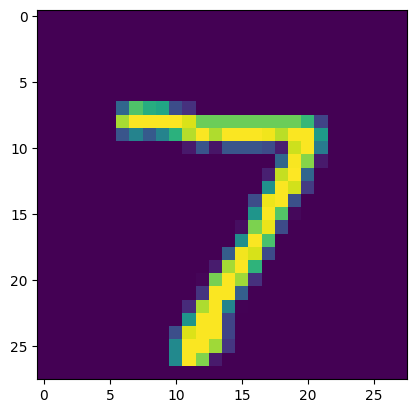

In [56]:
plt.figure()
plt.imshow(X_test[0])
plt.show()

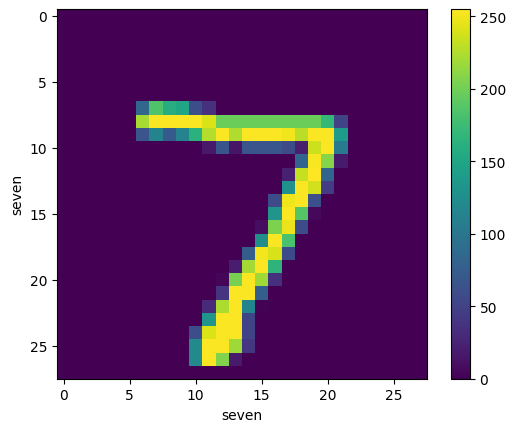

In [59]:
y_pred[0]
max_prop = np.max(y_pred[0])
index = np.argmax(y_pred[0])
prediction_class = class_names[index]
Ground_truth_class = class_names[y_test[0]]

plt.figure()
plt.imshow(X_test[0])
plt.xlabel(Ground_truth_class)
plt.ylabel(prediction_class)
plt.colorbar()
plt.show()

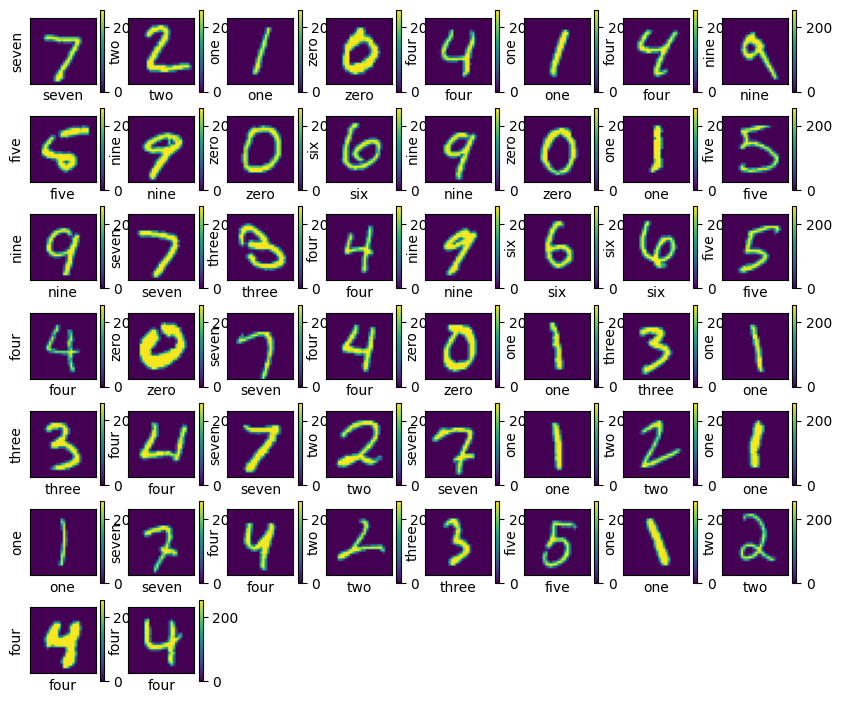

In [60]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i])
  plt.xlabel(class_names[y_test[i]])
  plt.ylabel(class_names[np.argmax(y_pred[i])])
  plt.colorbar()
plt.show()

In [66]:
max_proba = [np.max(i) for i in y_pred]
index = [np.argmax(i) for i in y_pred]
prediction_class = [class_names[i] for i in index]
Ground_truth_class = [class_names[i] for i in y_test]
d1 = pd.DataFrame(zip(max_proba,index,prediction_class,Ground_truth_class),
                  columns =['max_proba','index','prediction_class','Ground_truth_class'])
con = d1['prediction_class'] == d1['Ground_truth_class']
d1['output'] = np.where(con,1,0)

In [67]:
d1

,max_proba,index,prediction_class,Ground_truth_class,output
0,1.0,7,seven,seven,1
1,1.0,2,two,two,1
2,1.0,1,one,one,1
3,1.0,0,zero,zero,1
4,1.0,4,four,four,1
...,...,...,...,...,...
9995,1.0,2,two,two,1
9996,1.0,3,three,three,1
9997,1.0,4,four,four,1
9998,1.0,5,five,five,1
